# Modelo preditor de AVC

Primeiramente, é necessário importar algumas bibliotecas que serão utilizadas ao longo do projeto:

**Pandas**<br>
**Numpy**<br>
**Matplotlib**<br>
**Autograd**<br>
**Autograd.numpy**<br>
**Sklearn**<br>

In [96]:
import pandas as pd
import numpy as np
import autograd.numpy as np_
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

A primeira coisa que deve ser feita é a leitura do dataset, que está em formato .csv. Para isso, utilizaremos a biblioteca Pandas, que possui uma função específica para a leitura de arquivos .csv

Após roda a célula abaixo, o dataset será armazenado na variável **df** e será mostrado na tela algumas das linhas do dataset.

In [97]:
df = pd.read_csv('data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Para a manipulação dos dados fosse possível nas etapas seguintes do projeto, era necessário remover os valores do dataset **df** que eram nulos (**NaN**). Para isso, foi utilizada a função **dropna()** da biblioteca Pandas.

Após a remoção destes valores, agora o dataset possui apenas valores válidos.

In [98]:
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Mesmo removendo os valores nulos, ainda existia um problema que impedia o andamento do projeto: existiam no dataset valores categóricos, sendo algo que dificulta a leitura e manipulação dos dados. Desta forma, utilizamos a função **get_dummies()** da biblioteca Pandas para transformar os valores categóricos em valores numéricos, utilizando **one-hot encoding**, ou seja, cada valor categórico é transformado em uma coluna, e cada linha desta coluna possui o valor 1 ou 0, indicando se o valor categórico está presente ou não naquela linha.

Além disso, devido ao fato de estarmos explorando os principais motivos que poderiam causar um AVC de acordo com o dataset analisado, ao se manter colunas como **id**, **age** e etc., poderia haver uma distorção nos resultados finais, já que, mesmo estes valores não sendo relevantes para esta análise, eles poderiam servir como bias para o modelo preditor. Por isso, foi utilizado a função **drop()** da biblioteca Pandas para remover estas colunas.

Desta maneira, após as transformações descritas acima teremos um dataset com mais colunas, já que cada valor categórico foi transformado em uma coluna, sendo que cada uma delas possui apenas valores numéricos (0 ou 1).

In [99]:
df_clean = pd.get_dummies(df).astype(float)
df_clean = df_clean.drop(columns=['id','age','avg_glucose_level', 'bmi'])
df_clean

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Linear Classification Model

In [102]:
def loss( parametros ):
    w, b, pontos, real_value = parametros
    prediction = w.T @ pontos + b
    mse = np_.mean( (prediction - real_value)**2)
    return mse

g = grad(loss)

data = df_clean.drop(columns=["stroke"]).to_numpy().astype(float)

target = df_clean["stroke"].to_numpy().astype(float)

w = np.random.randn(data.shape[1],1)
b = 0.0
alpha = 10**-3
erros = []

for n in range(10000):
    grad_ = g( (w, b, data.T, target) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]
    erros.append(loss( (w, b, data.T, target) ))

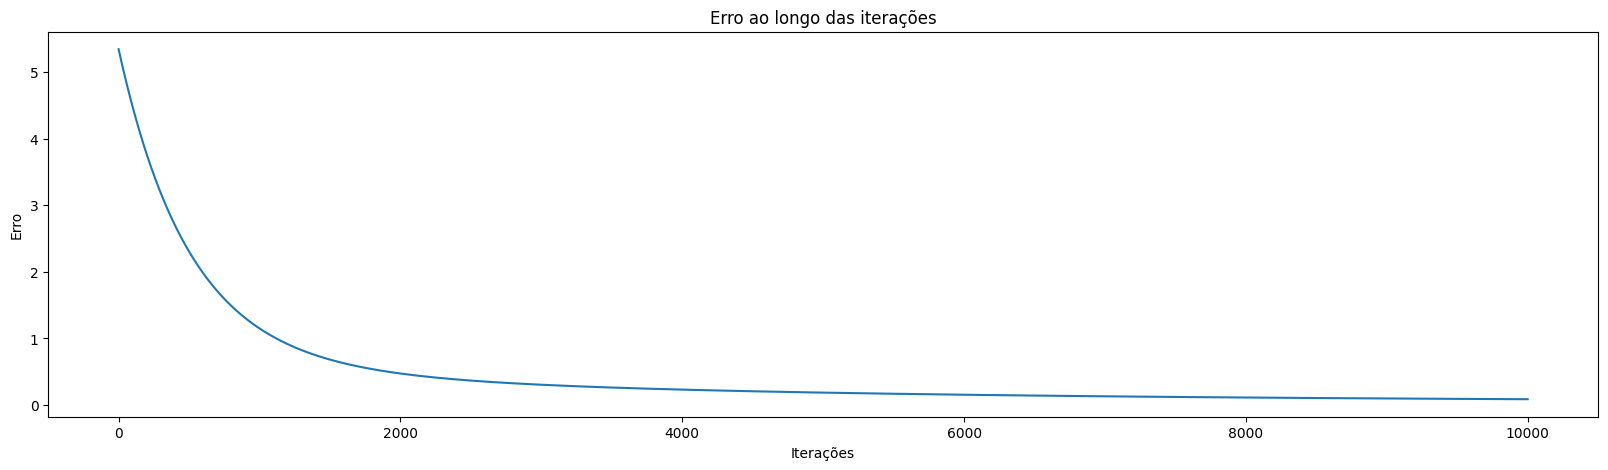

In [107]:
plt.figure(figsize=(20,5))
plt.plot(erros)
plt.title("Erro ao longo das iterações")
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()

In [108]:
print(w)
print(b)

[[-0.06979204]
 [-0.77456325]
 [ 0.58732916]
 [ 0.64046677]
 [-0.25528896]
 [-0.62817456]
 [-0.68619182]
 [ 0.17068903]
 [ 0.48726478]
 [ 0.12251741]
 [ 0.26616784]
 [-0.18816203]
 [-0.03688923]
 [-0.03955476]
 [ 0.41162103]
 [ 0.40267422]
 [ 0.34034951]
 [ 0.37330451]]
-0.3035942302809976


Modelo de classificação DecisionTreeClassifier

In [109]:
# dataset 
# data, all columns except stroke
X = df_clean.drop(columns=["stroke"])

# target, only stroke column
Y = df_clean["stroke"]

# split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

print(f"Accuracy: {clf.score(X_test, Y_test)}")

importance = []
for i in range(len(clf.feature_importances_)):
   importance.append((X.columns[i],clf.feature_importances_[i]))

importance.sort()
print( importance)


Accuracy: 0.9480651731160896
[('Residence_type_Rural', 0.04777574627441139), ('Residence_type_Urban', 0.03297088678636212), ('ever_married_No', 0.06038428705212117), ('ever_married_Yes', 0.0), ('gender_Female', 0.0544176392046585), ('gender_Male', 0.11056800123277652), ('gender_Other', 0.0), ('heart_disease', 0.14743165193961869), ('hypertension', 0.1251216105898291), ('smoking_status_Unknown', 0.05531783488823159), ('smoking_status_formerly smoked', 0.032421403195502595), ('smoking_status_never smoked', 0.06201288629302484), ('smoking_status_smokes', 0.0665971776986362), ('work_type_Govt_job', 0.024029563480105962), ('work_type_Never_worked', 0.0), ('work_type_Private', 0.08013038283620011), ('work_type_Self-employed', 0.1008209285285213), ('work_type_children', 0.0)]
